<a href="https://colab.research.google.com/github/Nurlyssultan/ML-DS-Cheat-Sheet/blob/main/Practical%20Statistics%20with%20Python/Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Statistics with Python 2/Inferential Statistics/Descriptive Statistics/Baseball.csv")
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [ ]:
df.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


In [ ]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


# Practical statistics with Python throughout many courses and books


## The elements of Data Types


#### Numeric Data Type
*   Continuous (live show data, wind speed, time duration)  
*   Discrete (number of players, counts of action)

#### Categorical Data Type
*   Binary (1/0, True/False, yes/no)
*   Ordinal (numeric rating like [1,2,3,4,5])






#### Rectangular Data


*   DataFrame - a table (rectangular data) like a spreadsheet in excel with rows and columns
*   Feature - a column within a table
*   Outcome - response,target of a row in dataset
*   Records - a row within a table





## Estimates of Location - Central Tendency

#### Mean
average *value*.
Consider the following set of num‐ bers: {3 5 1 2}. The mean is (3 + 5 + 1 + 2) / 4 = 11 / 4 = 2.75.

$ Mean = \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i$

In [ ]:
# Mean of Runs Scored
df.RS.mean()

715.0819805194806

In [ ]:
# Mean of Runs Scored by the Arizona Team (ARI)
df.loc[df.Team == "ARI"].RS.mean()

742.2

In [ ]:
# What is the average of Runs Allowed by the Chicago Tem (CHC)
#average before 2000 and after 2005
df.loc[(df.Team == "CHC") & ((df.Year < 2000) | (df.Year > 2005))].RA.mean()

725.4634146341464

In [ ]:
# Trim mean - calculate by dropping a fixed number of sorted values at each end and then taking an average of the remaining
st.trim_mean(df.RA, 0.1)

712.4371196754564

In [ ]:
# Weighted Mean
np.average(df.RA, weights=df.W)

708.0693761663022

#### Median
is the middle number on a sorted list.
median is robust to outliers

$$ Median = M_d = \begin{cases} X_{(n+1)/2} & \text{if } n \text{ is odd} \\\ \frac{X_{n/2} + X_{(n/2)+1}}{2} & \text{if } n \text{ is even} \end{cases}$$


In [ ]:
# Mean and Median of Wins (W)
print(df.W.mean())
print(df.W.median())

80.90422077922078
81.0


In [ ]:
# mean of Wins of the Baltimore Team (BAL) until 2000
df.loc[(df.Team == "BAL") & (df.Year <= 2000)].W.median()

89.0

#### Mode
the most common, repetitive element in a set

<Axes: >

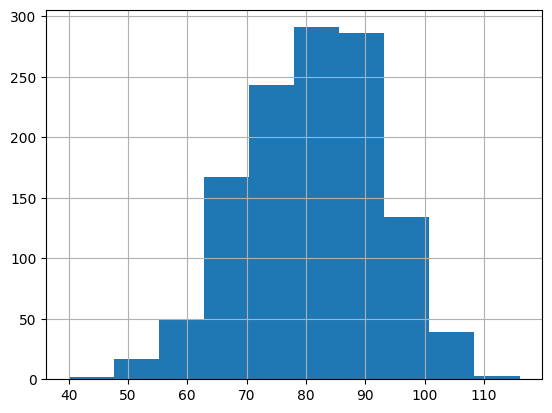

In [ ]:
# Mode
df.W.mode()
df.W.hist()

## Estimates of Variability - Dispersion

#### Standard Deviation measures the dispersion of a dataset
#### Variance is the square of standard deviation


$$ \text{Sample Variance} = S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2 $$
$$ \text{Sample Standard Deviation} = S = \sqrt{S^2} $$
$$ \text{Population Variance} = \sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (X_i - \mu)^2 $$
$$ \text{Population Standard Deviation} = \sigma = \sqrt{\sigma^2} $$


In [ ]:
# OOBP
print(f"Mean: {df.OOBP.mean()}")
print(f"STD sample: {df.OOBP.std()}")
print(f"STD pop: {df.OOBP.std(ddof = 0)}")
print(f"Variance: {df.OOBP.std() * df .OOBP.std()}")
print(f"Variance: {df.OOBP.var()}")

Mean: 0.3322642857142857
STD sample: 0.015295316041389943
STD pop: 0.015277096480377029
Variance: 0.00023394669280600052
Variance: 0.00023394669280600054


Mean of BA: 0.25927272727272727
STD Sample of BA: 0.012907228928000314
Variance of pop of BA: 0.00016646133412042514


<Axes: >

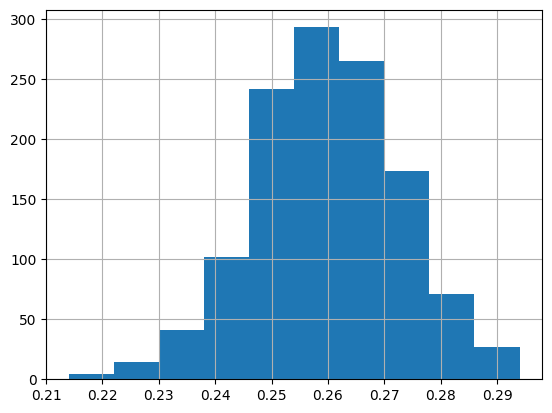

In [ ]:
print(f"Mean of BA: {df.BA.mean()}")
print(f"STD Sample of BA: {df.BA.std()}")
print(f"Variance of pop of BA: {df.BA.var(ddof = 0)}")
df.BA.hist()

#### Coefficient of Variation (CV) as a measure of data variability expressed as a % of mean

$CV = \frac{S}{\bar{X}} = \frac{\sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2}}{\frac{1}{n} \sum_{i=1}^{n} X_i}$

In [ ]:
# Coefficient of variation for Runs Scored variable
cv = df.RS.std() / df.RS.mean()
print(f"The CV for RS is {cv}")

#As a rule of thumb, data with variability has a cv > 1

The CV for RS is 0.1280053148279153



####Covariance
#### indicates the direction of the relationship between two variables


Covariance is a statistical measure that quantifies the degree to which two variables change together. In other words, it measures how much two variables vary together. If the covariance between two variables is positive, it means that when one variable increases, the other variable tends to increase as well. If the covariance is negative, it means that when one variable increases, the other variable tends to decrease. A covariance of zero indicates that there is no linear relationship between the two variables.

$ Cov(X,Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $

In [ ]:
df_co = df[["RS", "RA", "W"]]
df_co.cov()

,RS,RA,W
RS,8378.526986,3238.783688,536.724349
RA,3238.783688,8663.873859,-567.810176
W,536.724349,-567.810176,131.288950


### Standard Error
#### The standard error estimates how far the sample mean is likely to be from the population mean

$$ SE = \frac{S}{\sqrt{n}} $$

#### Standardization and z-score
#### Z-score estimates how far away is a data point from its mean
that represents how far away from std as to the mean

$$z = \frac{x - \mu}{\sigma}$$


In [ ]:
# Using Sklearn
from sklearn import preprocessing
df['delivery_time_standardized2'] = preprocessing.scale(df['Delivery Time'])
df

### Confidence Intervals for Large Samples
#### CI indicates how sure one can be that a statistical conclusion is accurate.
####Confidence intervals measure the certainty of a statistical conclusion's correctness.
####CI= mean +- Z * SE

#### Quantile


In [ ]:
df.RA.quantile([0.05,0.1,0.25,0.5,0.75])

0.05    571.10
0.10    597.00
0.25    649.75
0.50    709.00
0.75    774.25
Name: RA, dtype: float64

<Axes: >

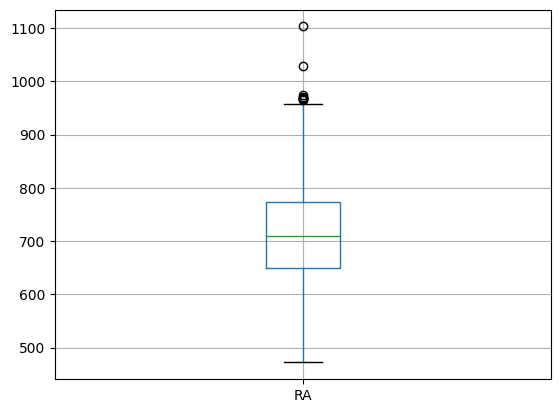

In [ ]:
# Boxplot
df.boxplot(column = "RA")

<Axes: >

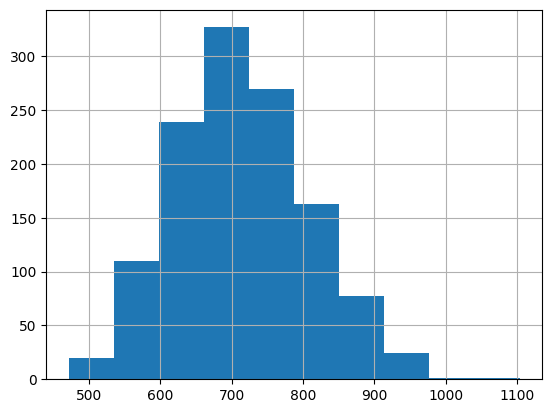

In [ ]:
# hist
df.RA.hist()

#### Correlation
#### measures the strength of a relationship between 2 variables

$$ Corr(X,Y) = \frac{Cov(X,Y)}{S_XS_Y} $$

#### Rule of thumb
#### Correlation > 0.5 -> strong
#### Correlation > 0.3 & < 0.5 -< medium
#### Correlation > 0.1 & < 0.3 -> low

In [ ]:
# Correlation Matrix
df_co.corr()

,RS,RA,W
RS,1.000000,0.380139,0.511745
RA,0.380139,1.000000,-0.532394
W,0.511745,-0.532394,1.000000


<Axes: >

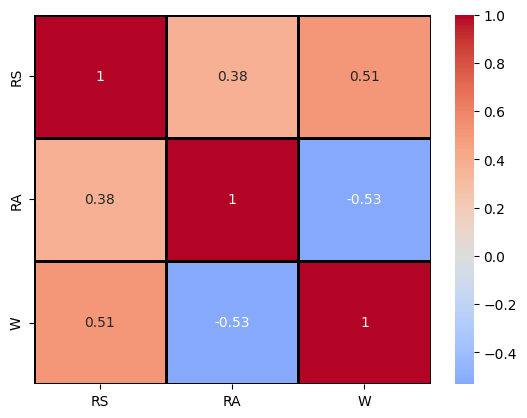

In [ ]:
# Visualization via Heatmap
sns.heatmap(data = df_co.corr(),
            annot = True,
            center = 0,
            cmap = 'coolwarm',
            linewidths = 1,
            linecolor = 'black')

<Axes: >

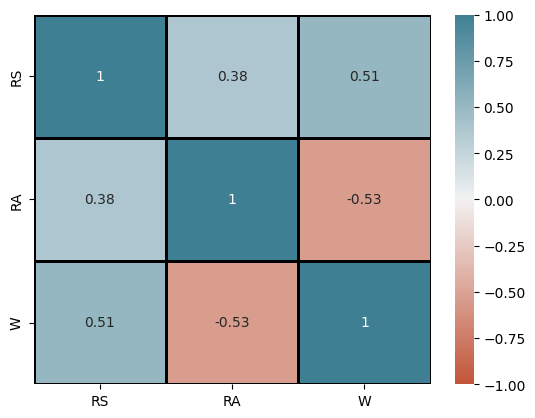

In [ ]:
# Visualization via Heatmap
sns.heatmap(data = df_co.corr(),
            annot = True,
            center = 0,
            vmin = -1,
            vmax = 1,
            cmap = sns.diverging_palette(20, 220, n = 256),
            linewidths = 1,
            linecolor = 'black')

<Axes: xlabel='RA', ylabel='W'>

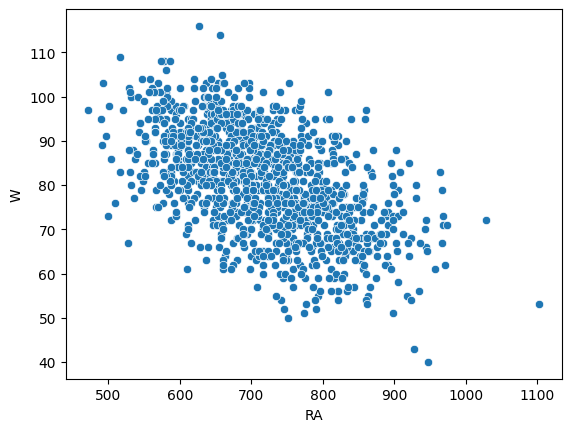

In [ ]:
# Scatter Plot
sns.scatterplot(data = df, x = "RA", y = "W")

#### Normal Distribution

<Axes: ylabel='Density'>

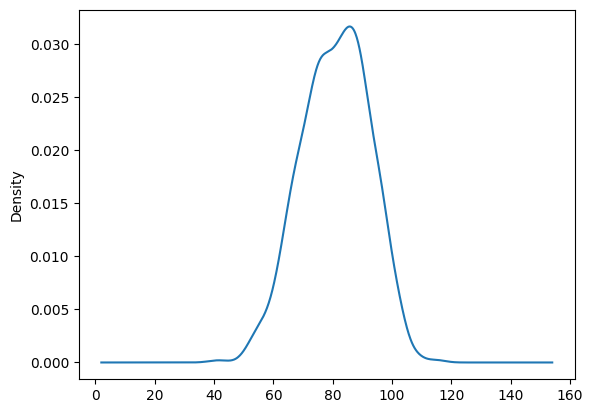

In [ ]:
# Plotting W
df.W.plot.density()

<Axes: ylabel='Density'>

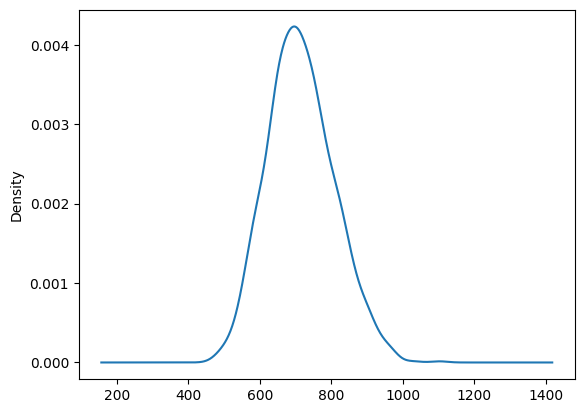

In [ ]:
# Density plot for RAs
df.RA.plot.density()

In [ ]:
# Do the 68-95-99 check, but use a for plot
for i in range(1,7):
  print(df.loc[(df.RA <= df.RA.mean() + i * df.RA.std()) &
        (df.RA >= df.RA.mean() - i * df.RA.std())].RA.count()/df.RA.count())

0.674512987012987
0.9594155844155844
0.9983766233766234
0.9991883116883117
1.0
1.0
